In [1]:
import os
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull
# from statannotations.Annotator import Annotator

from analyse_util import figure_size, set_plt, set_Border
from velocity_util import read_pdb

In [2]:
def _draw(values, key, title=None):
    set_plt(figsize=(20, 10))
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()

    min_values = 65536
    max_values = 0
    for cell_type in values.keys():
        plt.plot(
            list(range(1, len(values[cell_type][key])+1)), values[cell_type][key], label=cell_type,
            linewidth=figure_size['small'])
        min_values = min(min_values, min(values[cell_type][key]))
        max_values = max(max_values, max(values[cell_type][key]))

    set_Border(plt.gca())

    plt.xticks([i for i in range(1, 10)])
    plt.xlim((0, 10))
    plt.ylim((min_values*0.99, max_values*1.01))

    plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
    plt.grid(False)
    
    plt.xlabel('pseudo-time', fontsize=figure_size['ultra'])
    plt.ylabel(key, fontsize=figure_size['ultra'])
#     plt.title(key, fontsize=figure_size['ultra'])
    plt.legend(
        facecolor='white', loc='upper right', framealpha=0, handletextpad=1, borderpad=0, borderaxespad=0
    ).get_frame().set_linewidth(0.0)
    
    if title:
        plt.savefig(os.path.join('/lmh_data/work/SEE/analyse/figure_file/', title), format='pdf', bbox_inches='tight')
    plt.show()

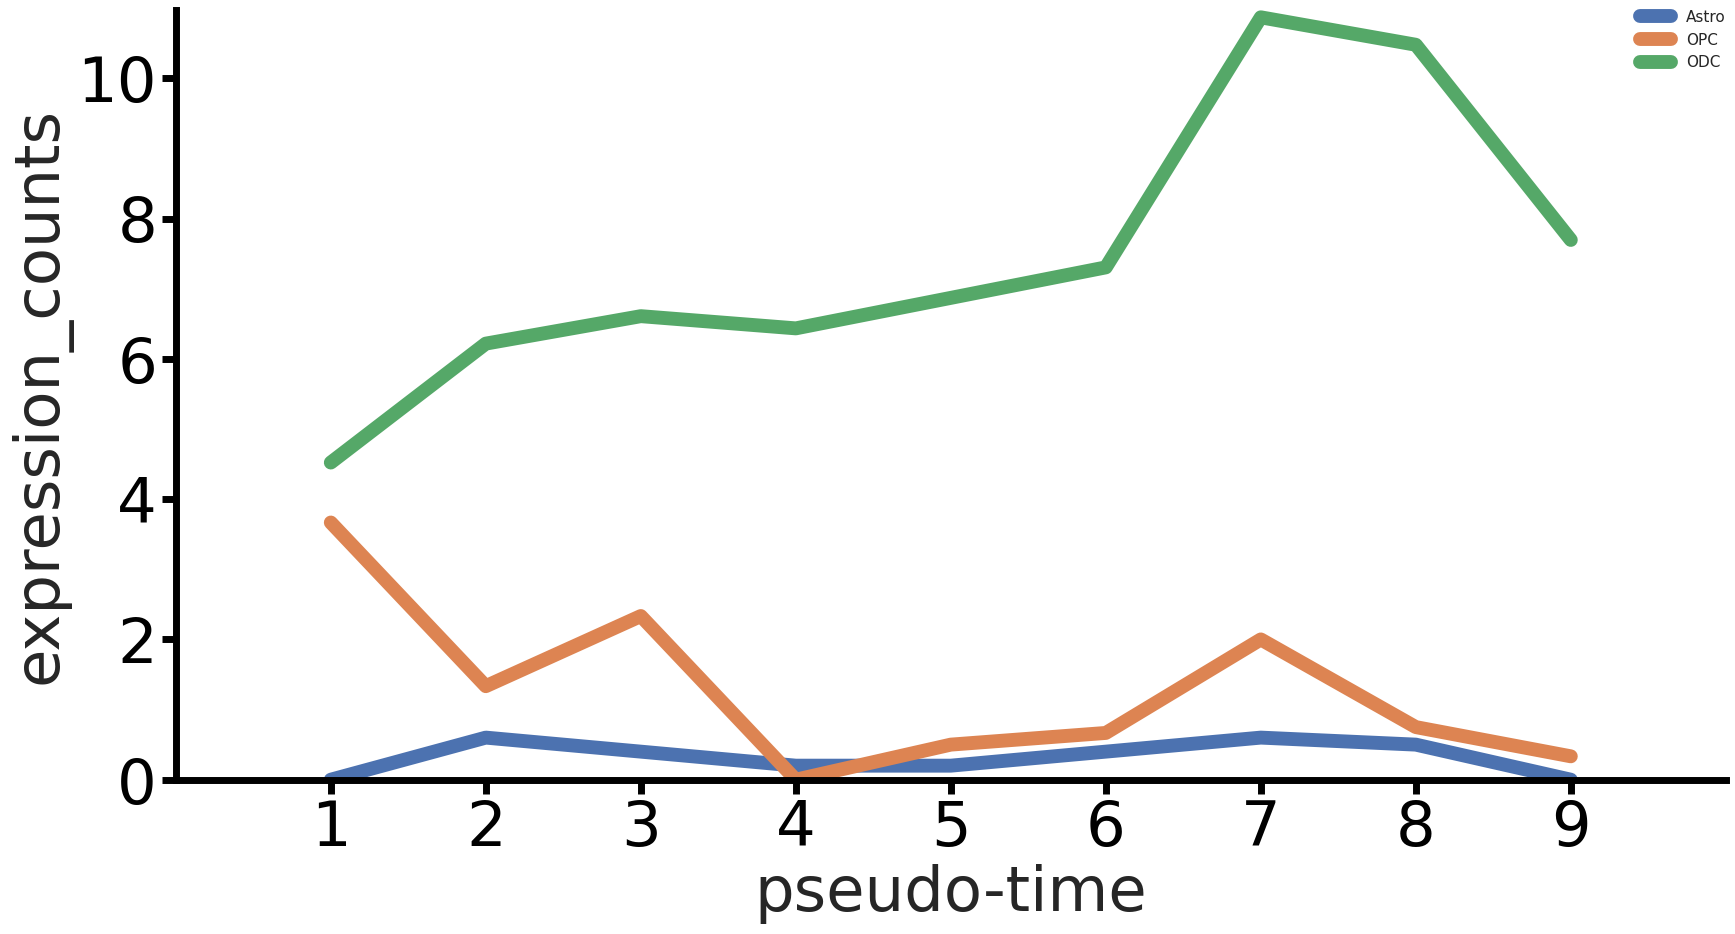

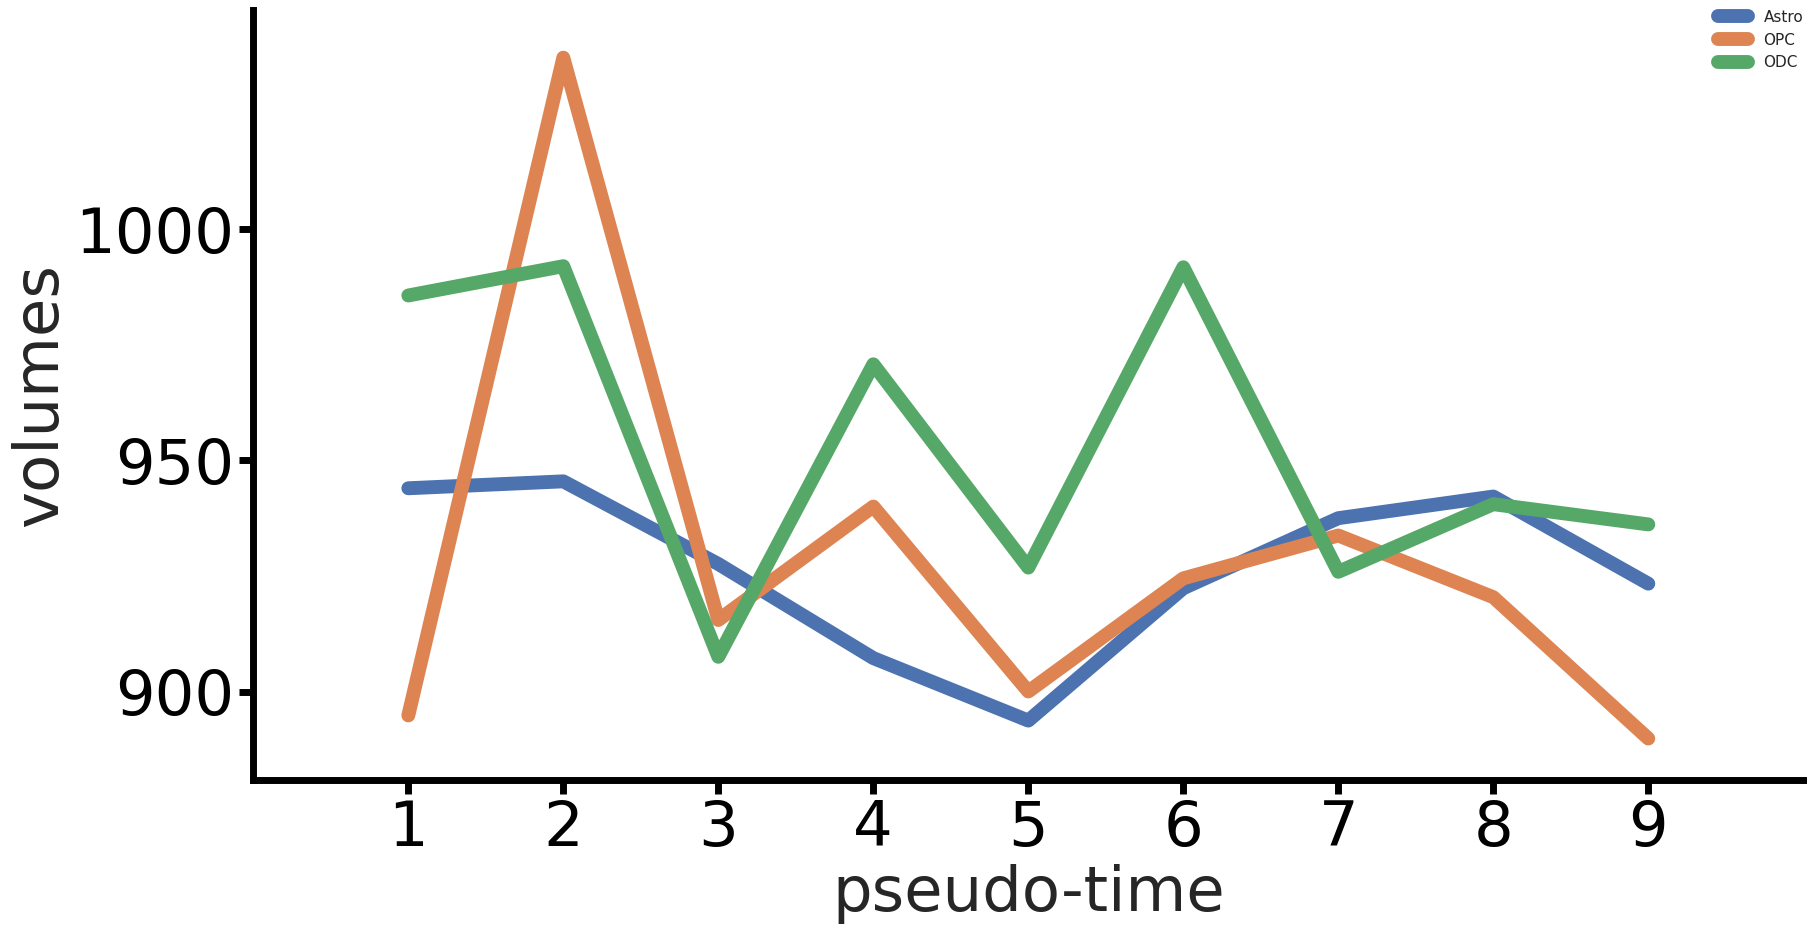

In [3]:
gene_name = 'PIP4K2A'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name)), allow_pickle=True).item(),
}, 'expression_counts', 'vibration/{}_expression_counts.pdf'.format(gene_name))
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name)), allow_pickle=True).item(),
}, 'volumes', 'vibration/{}_volumes.pdf'.format(gene_name))

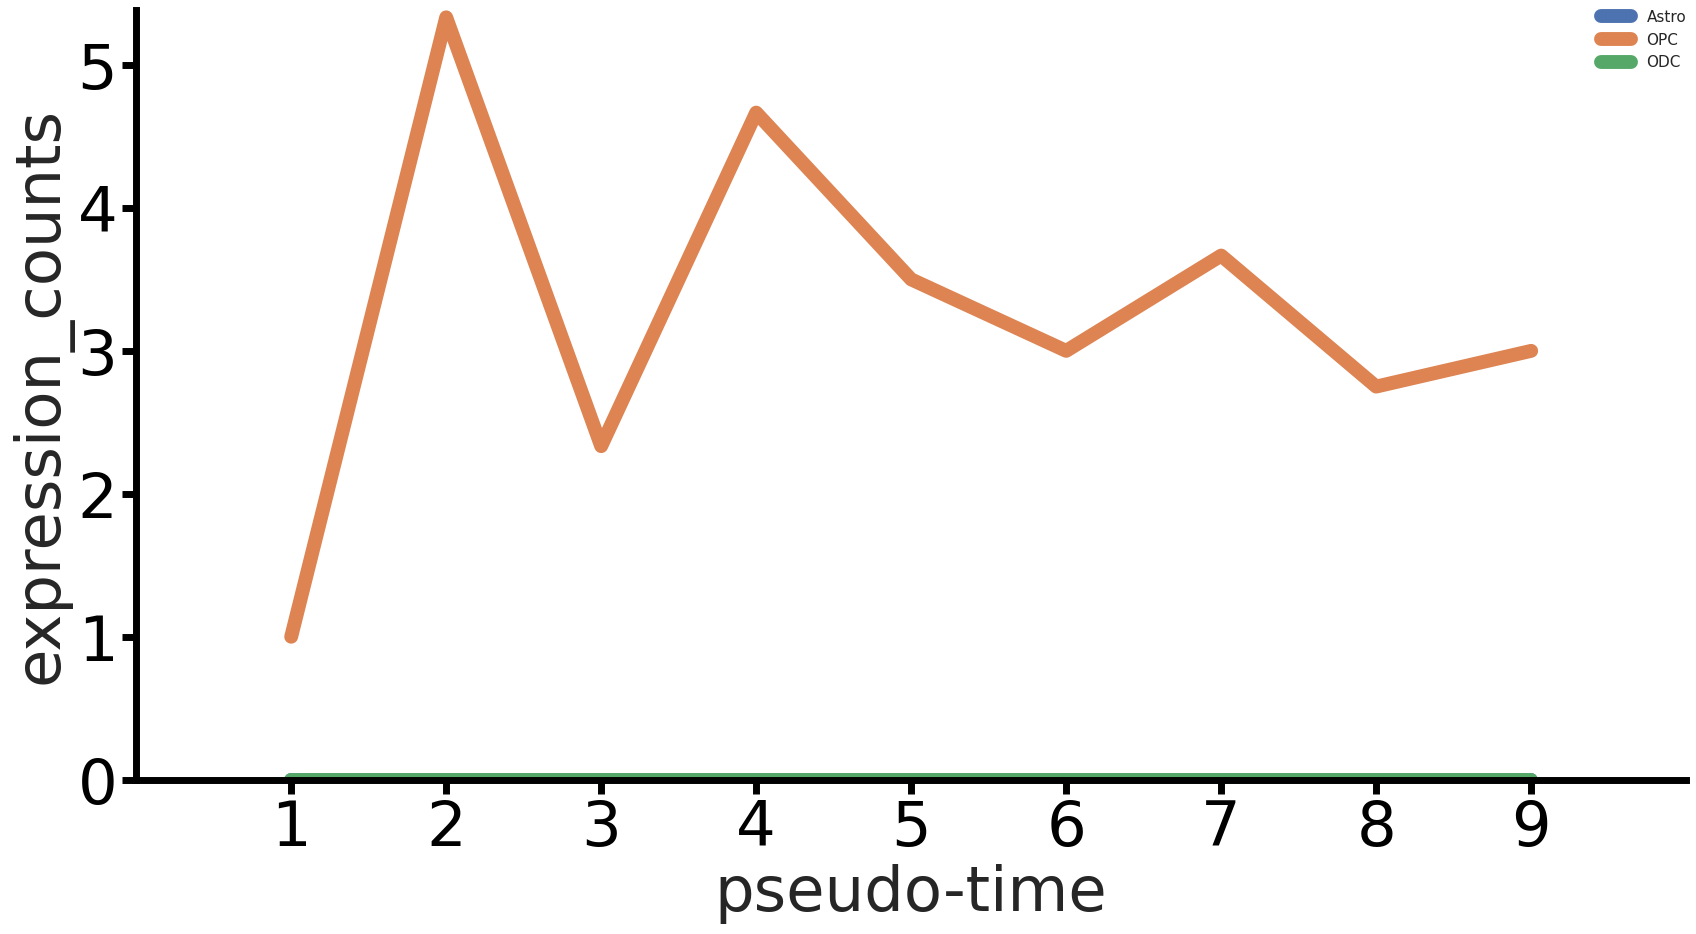

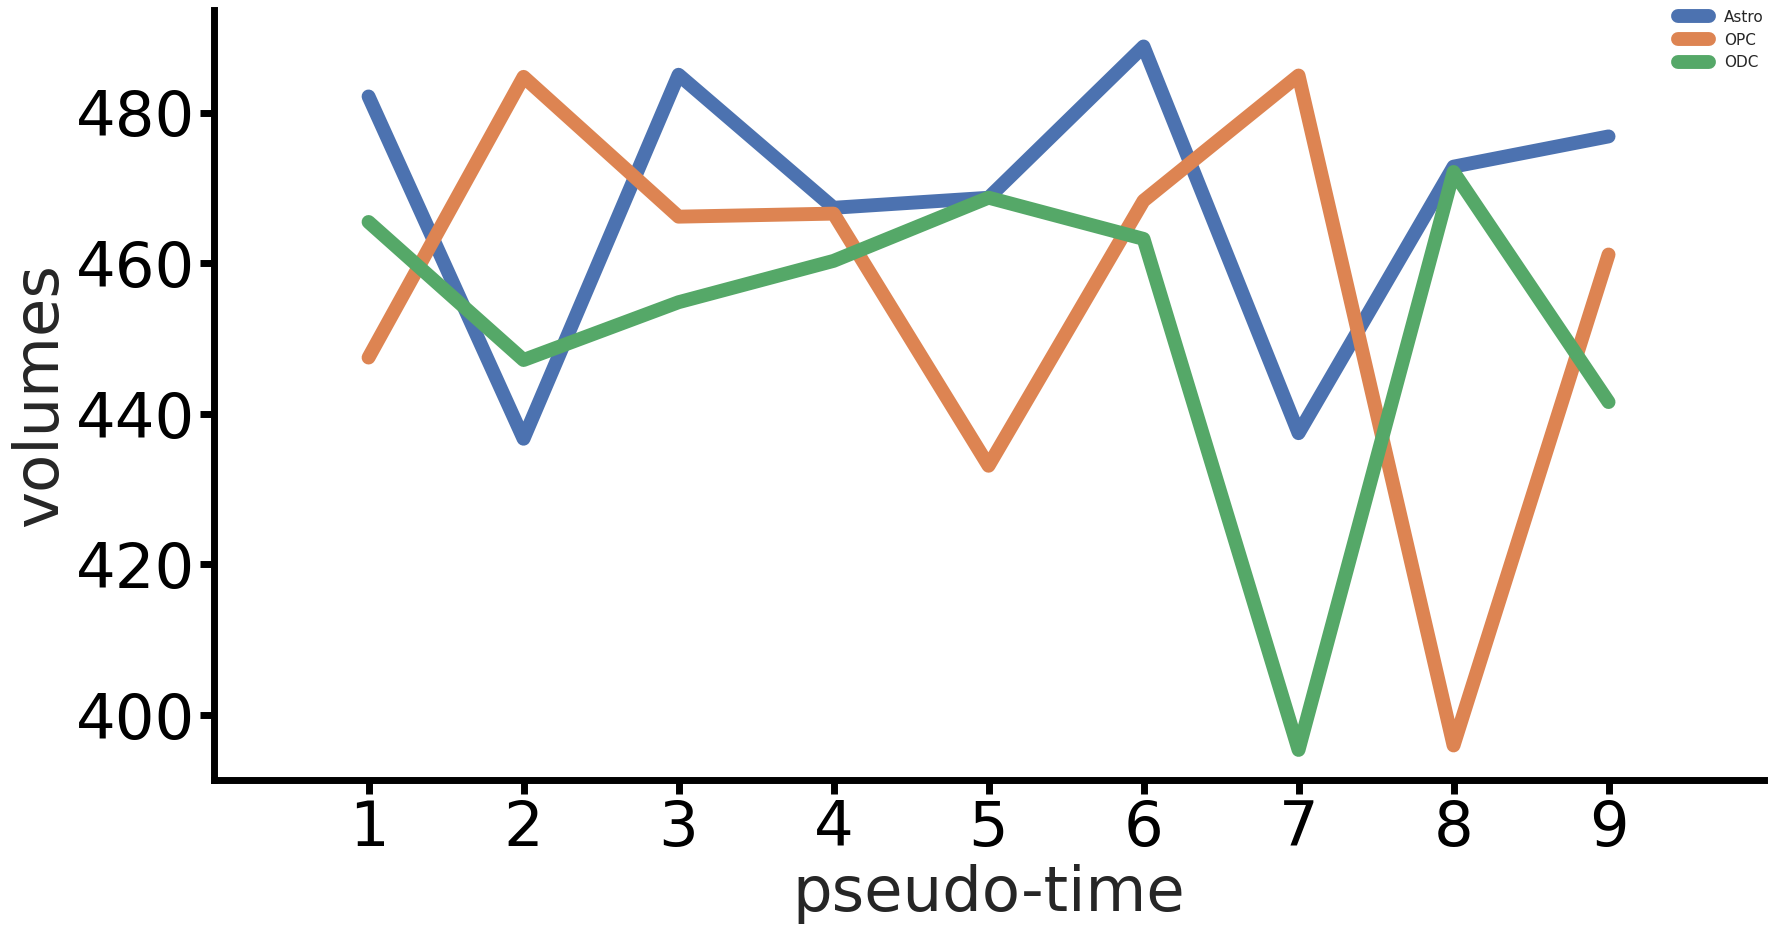

In [4]:
gene_name = 'PDGFRA'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'expression_counts', 'vibration/{}_expression_counts.pdf'.format(gene_name))
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'volumes', 'vibration/{}_volumes.pdf'.format(gene_name))

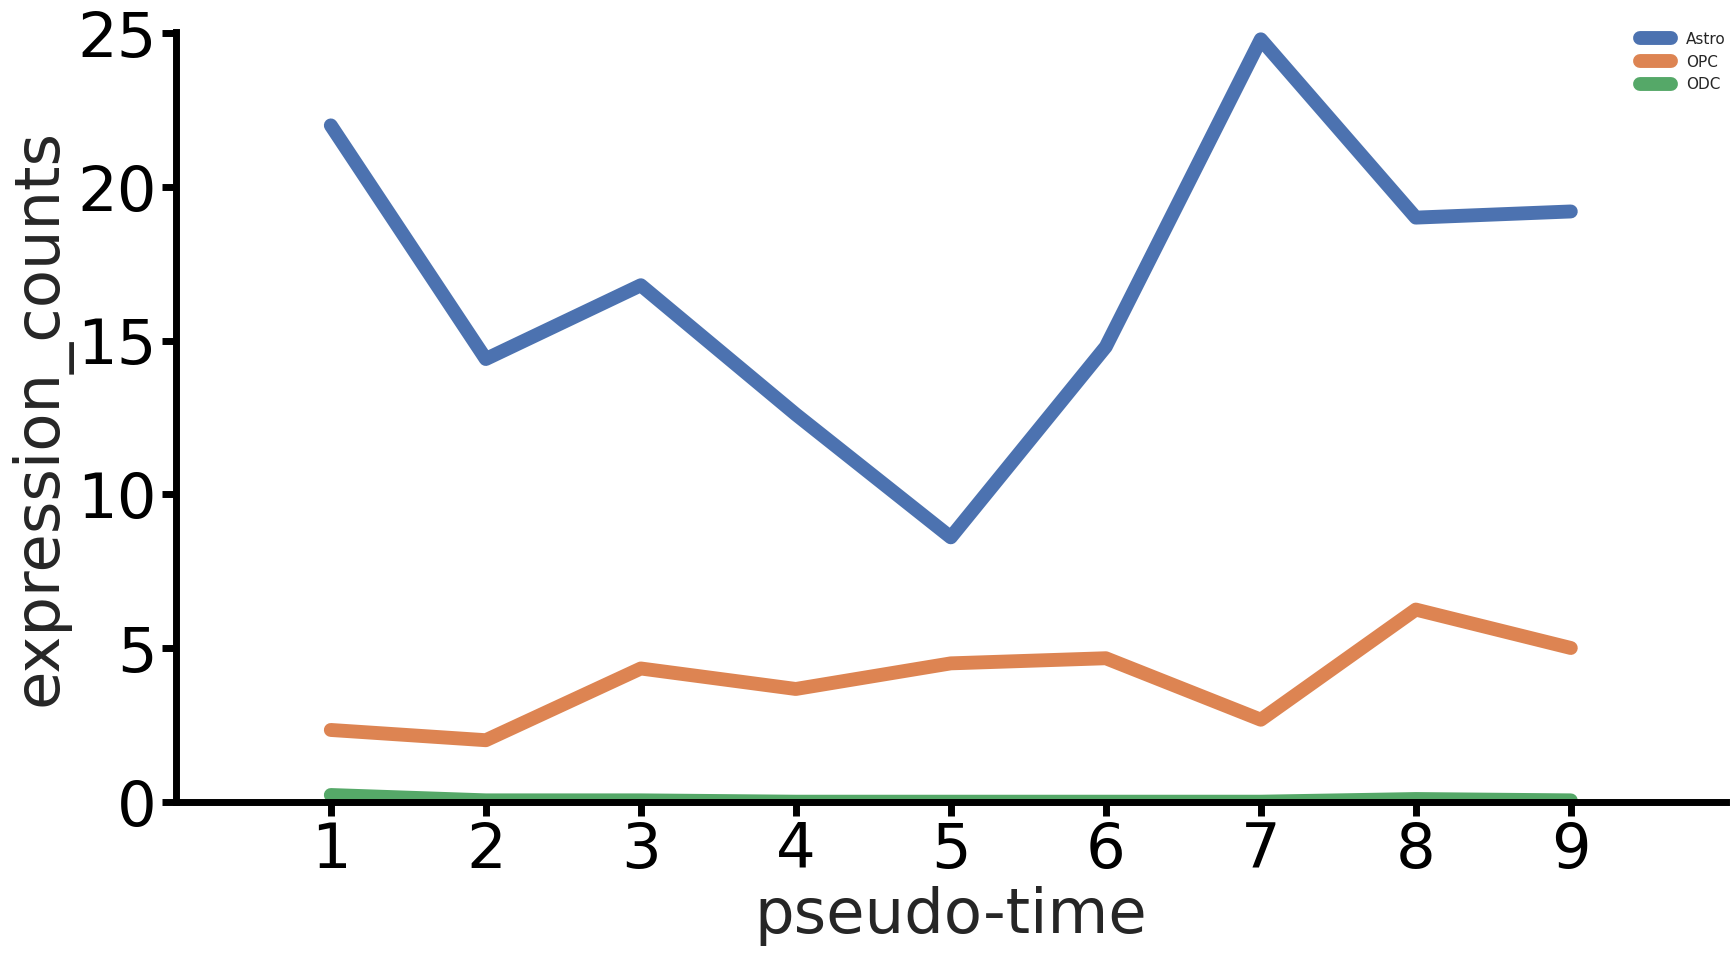

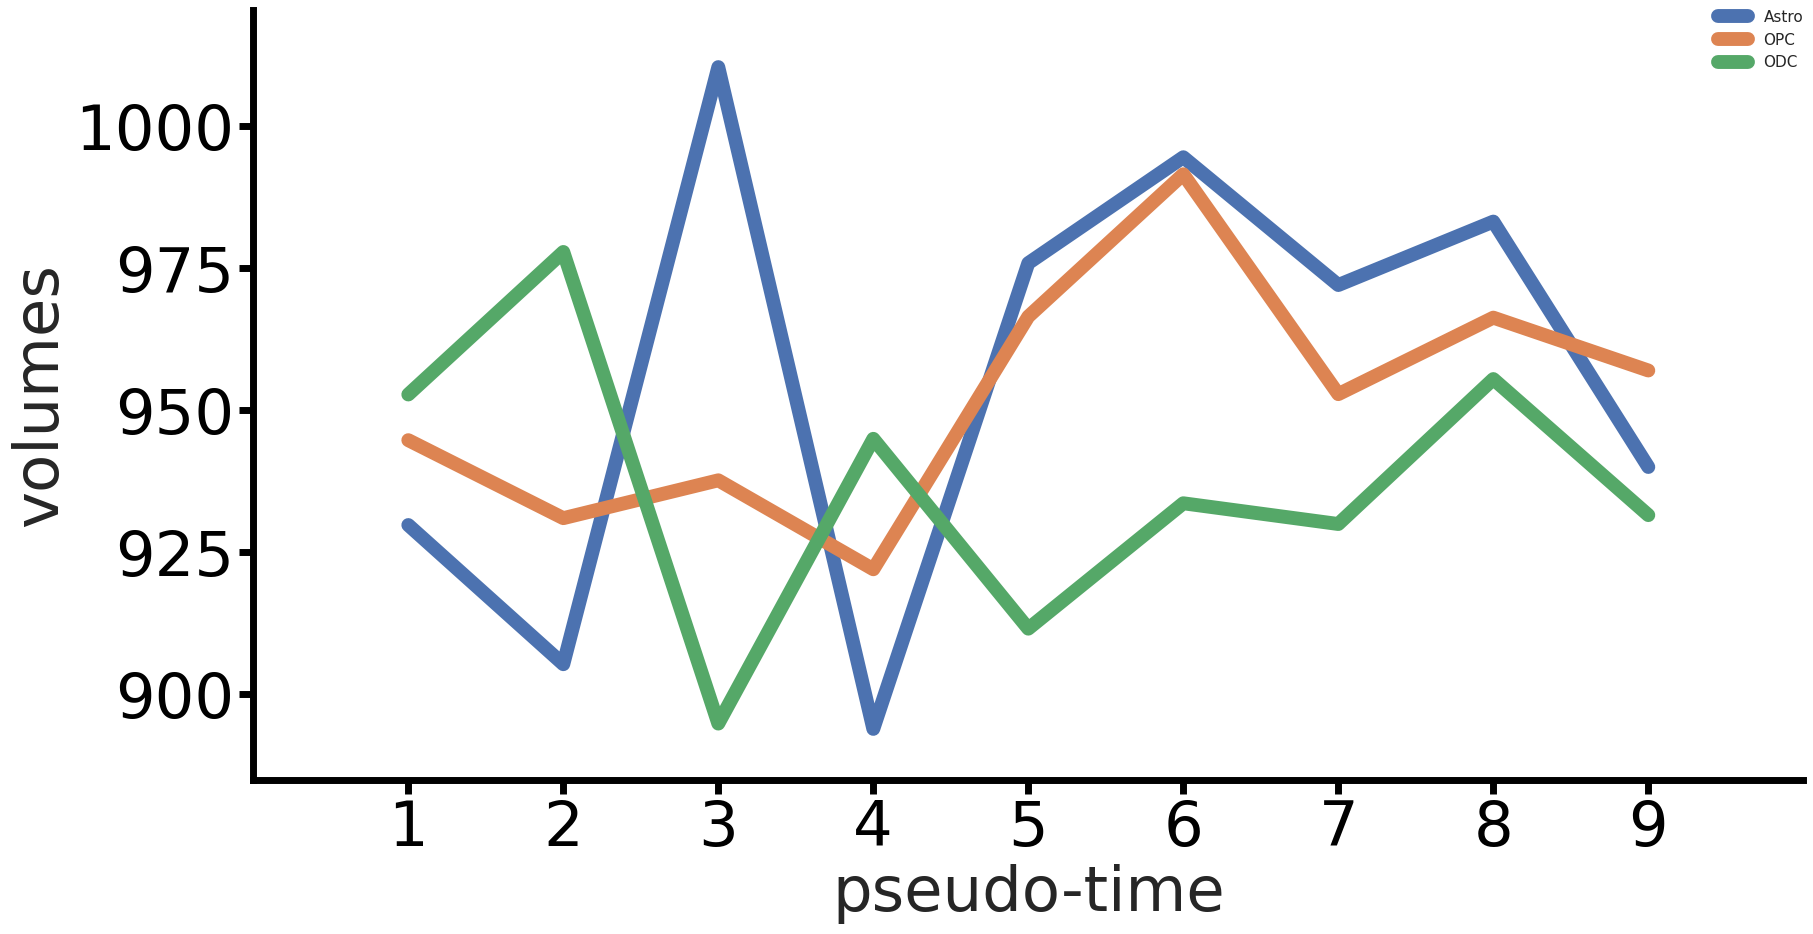

In [5]:
gene_name = 'SLC1A2'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'expression_counts', 'vibration/{}_expression_counts.pdf'.format(gene_name))
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'volumes', 'vibration/{}_volumes.pdf'.format(gene_name))

In [6]:
from velocity_util import find_best_pdb
from scipy import stats
def get_volumes(dir_path):
    def calculate_volume(points):
        return ConvexHull(points).volume

    pseudo_times = [str(i) for i in range(1, 10)]
    volumes = []

    for pseudo_time in pseudo_times:
        _pdb_path = find_best_pdb('./{}/{}'.format(dir_path, pseudo_time))
        volumes.append(calculate_volume(read_pdb(_pdb_path)))
    return [volumes[i+1] - volumes[i] for i in range(len(volumes) - 1)]

def box(data, x=None, y=None, hue=None, x_label=None, y_label=None, xticklabels=None, output_path: str = None):
    set_plt(figsize=(15, 10))
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()

    ax = sns.boxplot(data=data, x=x, y=y, hue=hue, linewidth=figure_size["very_small"])
    
#     pairs = (
#         [("PIP4K2A", "Astro"), ("PIP4K2A", "ODC")],
#         [("PIP4K2A", "OPC"), ("PIP4K2A", "ODC")],
#         [("SLC1A2", "Astro"), ("SLC1A2", "OPC")],
        
#         [("PIP4K2A", "ODC"), ("SLC1A2", "OPC")],
#         [("PDGFRA", "Astro"), ("PDGFRA", "ODC")],
#         [("PDGFRA", "ODC"), ("SLC1A2", "ODC")],
#     )
#     annotator = Annotator(ax, pairs, data=data, x=x, y=y, hue=hue)
#     annotator.configure(
#         test='Levene', text_format='simple',
#         line_width=figure_size['very_small'], fontsize=figure_size['middle'])
#     annotator.apply_and_annotate()

    set_Border(plt.gca())
    plt.tick_params(
        colors="black", bottom=True, left=True, labelsize=figure_size["ultra"]
    )
    plt.legend(
        frameon=False,
        markerscale=2,
        borderpad=1,
        borderaxespad=0,
        fontsize=figure_size["middle"],
        loc="lower right",
    )
    plt.grid(False)

    if x_label:
        plt.xlabel(x_label, fontsize=figure_size["ultra"])
    if y_label:
        plt.ylabel(y_label, fontsize=figure_size["ultra"])
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")

    plt.show()

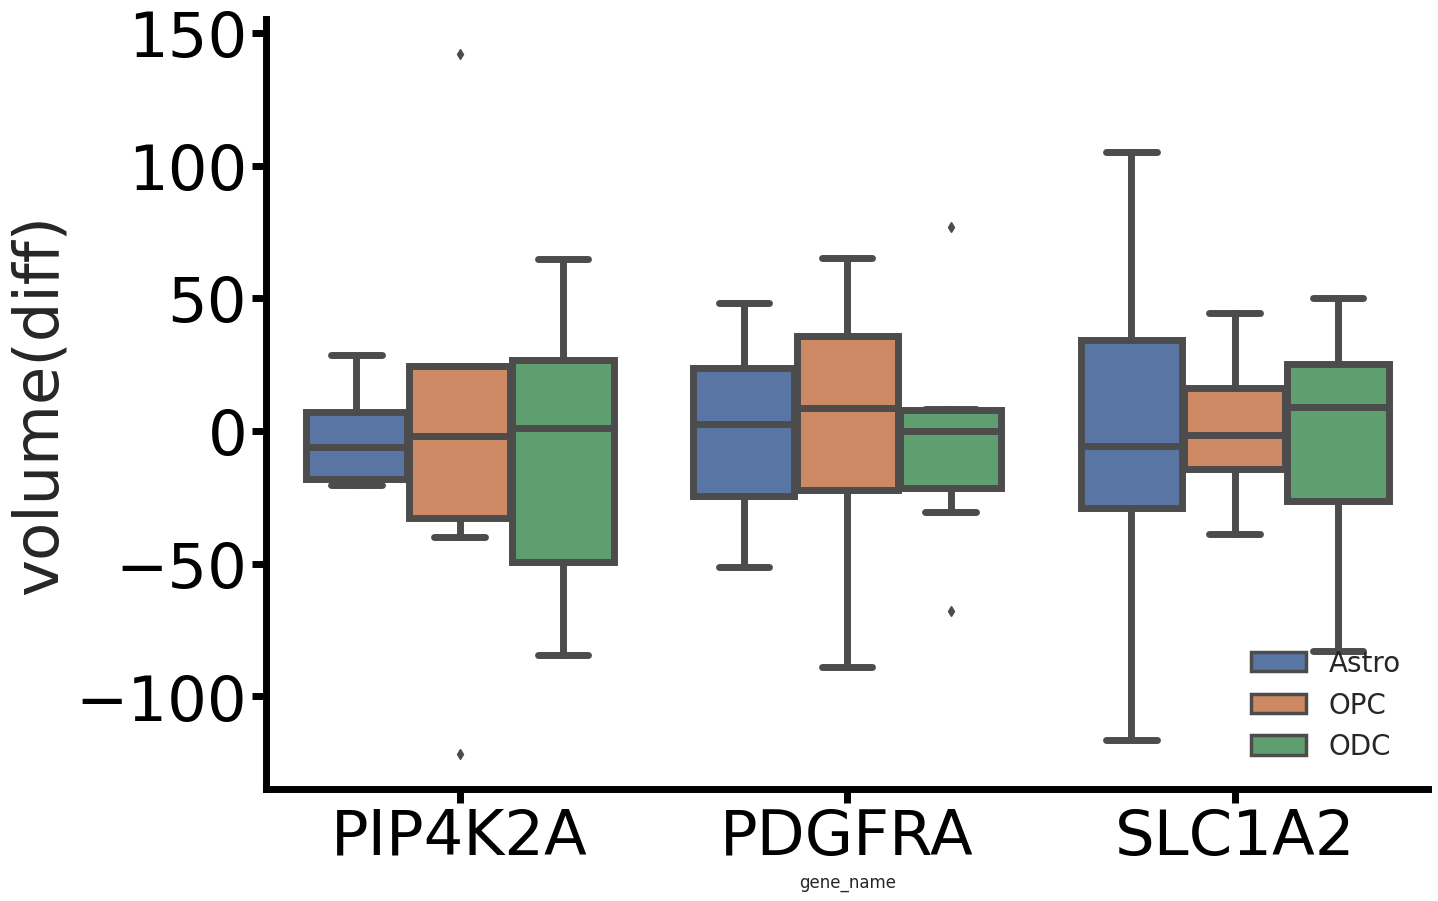

In [7]:
PIP4K2A = pd.DataFrame({
    'Astro': get_volumes('PIP4K2A_Astro'),
    'OPC': get_volumes('PIP4K2A_OPC'),
    'ODC': get_volumes('PIP4K2A'),
})
PIP4K2A = pd.melt(PIP4K2A, var_name='cell type', value_name='value')
PIP4K2A['gene_name'] = 'PIP4K2A'
PDGFRA = pd.DataFrame({
    'Astro': get_volumes('PDGFRA_Astro'),
    'OPC': get_volumes('PDGFRA_OPC'),
    'ODC': get_volumes('PDGFRA_ODC'),
})
PDGFRA = pd.melt(PDGFRA, var_name='cell type', value_name='value')
PDGFRA['gene_name'] = 'PDGFRA'
SLC1A2 = pd.DataFrame({
    'Astro': get_volumes('SLC1A2_Astro'),
    'OPC': get_volumes('SLC1A2_OPC'),
    'ODC': get_volumes('SLC1A2_ODC'),
})
SLC1A2 = pd.melt(SLC1A2, var_name='cell type', value_name='value')
SLC1A2['gene_name'] = 'SLC1A2'

box(
    pd.concat([PIP4K2A, PDGFRA, SLC1A2]), x='gene_name', y='value', hue='cell type', y_label='volume(diff)',
    output_path='/lmh_data/work/SEE/analyse/figure_file/vibration/volumediff_distribution.pdf')

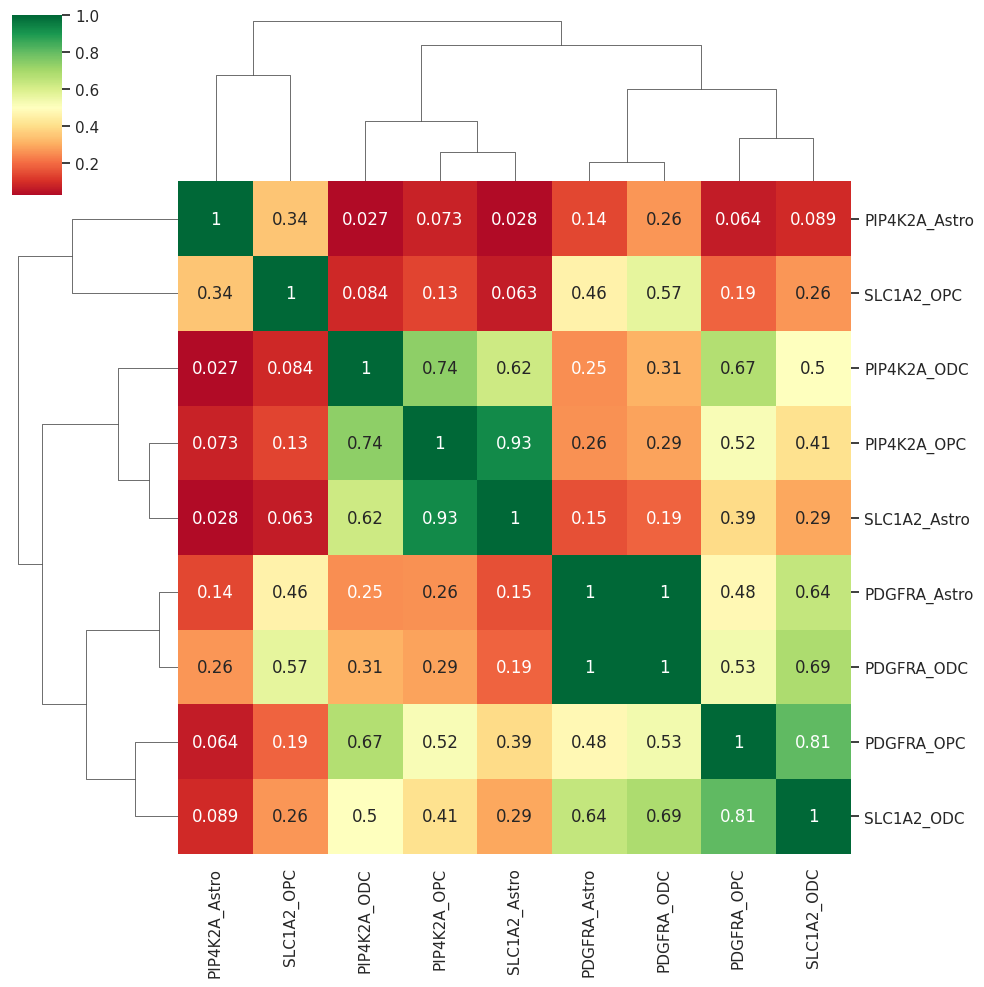

In [8]:
data = pd.concat([PIP4K2A, PDGFRA, SLC1A2]).copy()
data['genename&celltype'] = data['gene_name'] + '_' + data['cell type']
data['ID'] = [i for i in range(8)] * len(data['genename&celltype'].unique())
data.drop(['gene_name', 'cell type'], axis=1, inplace=True)

data = data.pivot(index='ID', columns='genename&celltype', values='value')


levene_results = {}
for column in data.columns:
    levene_results[column] = {}
    for _column in data.columns:
        levene_results[column][_column] = stats.levene(data[column], data[_column]).pvalue

levene_df = pd.DataFrame.from_dict(levene_results, orient='index')

set_plt(figsize=(10, 10))
sns.set_theme(style="whitegrid")

sns.clustermap(levene_df, cmap='RdYlGn', center=0.5, annot=True)

plt.savefig(
    '/lmh_data/work/SEE/analyse/figure_file/vibration/volumediff_distributionvariance.pdf', bbox_inches="tight")
plt.show()

In [9]:
key = 'expression_counts'

gene_name = 'PIP4K2A'
PIP4K2A = pd.DataFrame({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item()[key],
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item()[key],
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name)), allow_pickle=True).item()[key],
})
PIP4K2A = pd.melt(PIP4K2A, var_name='cell type', value_name='value')
PIP4K2A['gene_name'] = gene_name

gene_name = 'PDGFRA'
PDGFRA = pd.DataFrame({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item()[key],
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item()[key],
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item()[key],
})
PDGFRA = pd.melt(PDGFRA, var_name='cell type', value_name='value')
PDGFRA['gene_name'] = gene_name

gene_name = 'SLC1A2'
SLC1A2 = pd.DataFrame({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item()[key],
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item()[key],
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item()[key],
})
SLC1A2 = pd.melt(SLC1A2, var_name='cell type', value_name='value')
SLC1A2['gene_name'] = gene_name


data = pd.concat([PIP4K2A, PDGFRA, SLC1A2]).copy()
data['genename&celltype'] = data['gene_name'] + '_' + data['cell type']
data['ID'] = [i for i in range(9)] * len(data['genename&celltype'].unique())
data.drop(['gene_name', 'cell type'], axis=1, inplace=True)

data = data.pivot(index='ID', columns='genename&celltype', values='value')
data

genename&celltype,PDGFRA_Astro,PDGFRA_ODC,PDGFRA_OPC,PIP4K2A_Astro,PIP4K2A_ODC,PIP4K2A_OPC,SLC1A2_Astro,SLC1A2_ODC,SLC1A2_OPC
ID,,,,,,,,,
0,0.0,0.0,1.0,0.0,4.521739,3.6666667,22.0,0.2173913,2.3333333
1,0.0,0.0,5.3333335,0.6,6.2173915,1.3333334,14.4,0.04347826,2.0
2,0.0,0.0,2.3333333,0.4,6.6086955,2.3333333,16.8,0.04347826,4.3333335
3,0.0,0.0,4.6666665,0.2,6.4347825,0.0,12.6,0.0,3.6666667
4,0.0,0.0,3.5,0.2,6.869565,0.5,8.6,0.0,4.5
5,0.0,0.0,3.0,0.4,7.304348,0.6666667,14.8,0.0,4.6666665
6,0.0,0.0,3.6666667,0.6,10.869565,2.0,24.8,0.0,2.6666667
7,0.0,0.0,2.75,0.5,10.478261,0.75,19.0,0.08695652,6.25
8,0.0,0.0,3.0,0.0,7.695652,0.33333334,19.2,0.04347826,5.0


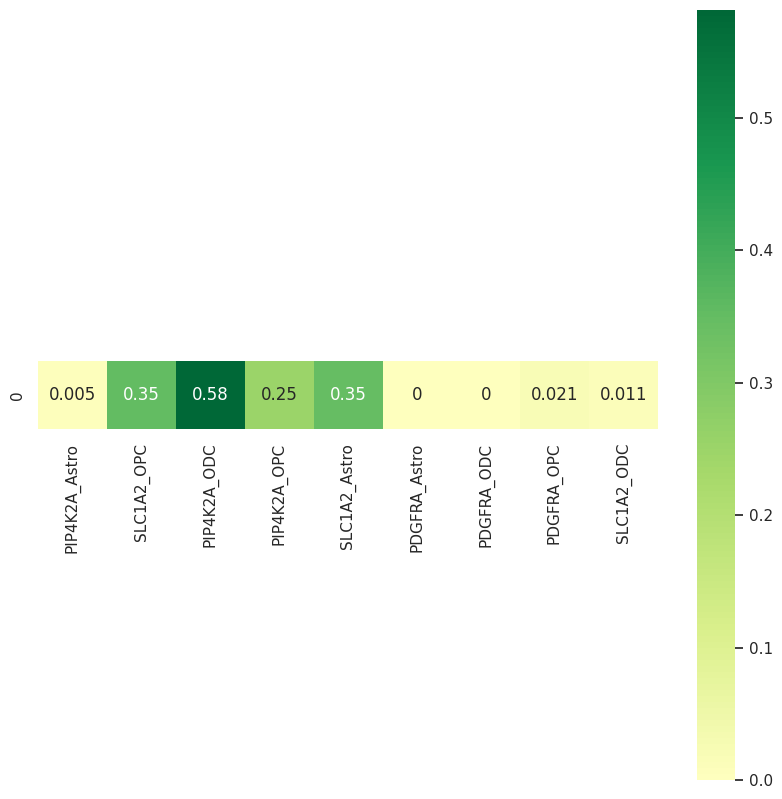

In [10]:
slopes = []
columns = [
    'PIP4K2A_Astro', 'SLC1A2_OPC', 'PIP4K2A_ODC',
    'PIP4K2A_OPC', 'SLC1A2_Astro', 'PDGFRA_Astro',
    'PDGFRA_ODC', 'PDGFRA_OPC', 'SLC1A2_ODC'
]
for column in columns:
    x_data = data.index.values
    y_data = data[column].astype(float).values
    coeffs = np.polyfit(x_data, y_data, 1)  # 进行一阶多项式拟合
    slope, intercept = coeffs
    slopes.append(abs(slope))
slopes = pd.DataFrame([slopes], columns=columns)

set_plt(figsize=(10, 10))
sns.set_theme(style="whitegrid")

sns.heatmap(slopes, xticklabels=columns, cmap='RdYlGn', center=0, square=True, annot=True)

plt.savefig(
    '/lmh_data/work/SEE/analyse/figure_file/vibration/expression slope.pdf', bbox_inches="tight")
plt.show()